In [1]:
import torch
import numpy as np
from torchviz import make_dot
from torch.autograd import Variable

## Performance comparision

In [2]:
#normal numpy matrix, numpy matrices are not optimized for GPU usage
numpy_mat = np.random.rand(1000,1000)*100

#torch tensor but used on CPU
torch_no_gpu_mat = torch.rand(1000,1000) * 100


#torch tensor is moved to GPU cores for storage
torch_gpu_mat = torch.rand(1000,1000).to(torch.device("cuda"))*100

print("Matrix multiplication in numpy -")
%timeit numpy_mat **2 
print('')

print("Matrix multiplication with no GPU cores")
%timeit torch_no_gpu_mat **2
print('')

print("Matrix multiplication with GPU cores")
%timeit torch_gpu_mat ** 2
print('')

Matrix multiplication in numpy -
297 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Matrix multiplication with no GPU cores
37 µs ± 4.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Matrix multiplication with GPU cores
27.6 µs ± 55.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)



In [3]:
print(f'normal tensors run on {torch_no_gpu_mat.device}')
print(f'tensors moved to CUDA cores run on {torch_gpu_mat.device}')

normal tensors run on cpu
tensors moved to CUDA cores run on cuda:0


## Autograd

In [96]:
x = torch.tensor([2.0],requires_grad = True)
coeff = torch.tensor([2.0], requires_grad = True)
temp = x ** 2
result = coeff * temp
coeff,temp

(tensor([2.], requires_grad=True), tensor([4.], grad_fn=<PowBackward0>))

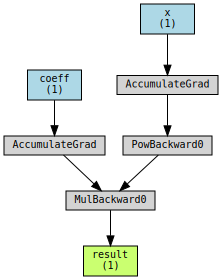

In [97]:
#creates a computational graph for the constructed function
make_dot(result, params={k: v for k, v in locals().items() if isinstance(v, Variable)})

In [98]:
#grad function attribute references the function which was used to create the object whose attribute we are accessing

print(f'function used in calculating result {result.grad_fn}') #means we used a multiplication fn

function used in calculating result <MulBackward0 object at 0x7fdff44c3250>


In [99]:
#we can trace back the history of the computation graph using the .next functions attribute

print(f'result grad func {result.grad_fn}')
print(f'grad fn of result is linked to {result.grad_fn.next_functions}')

print('-----')


print(result.grad_fn.next_functions[0][0].next_functions) #further tracing back unitl we reach just the nodes of tensors
print(result.grad_fn.next_functions[1][0].next_functions)

print('-----')

print(result.grad_fn.next_functions[1][0].next_functions[0][0].next_functions)




result grad func <MulBackward0 object at 0x7fdff44c3250>
grad fn of result is linked to ((<AccumulateGrad object at 0x7fdff44c3640>, 0), (<PowBackward0 object at 0x7fdff44c3880>, 0))
-----
()
((<AccumulateGrad object at 0x7fdff44c3460>, 0),)
-----
()


In [100]:
temp.grad_fn #means we used a power function

In [101]:
result.grad_fn(torch.tensor(1.0))# this just multiplies each value in the corresponing grad function with the passed value 

(tensor([4.], grad_fn=<MulBackward0>), tensor([2.], grad_fn=<MulBackward0>))

In [102]:
temp.grad_fn(result.grad_fn(torch.tensor(1.0))[1])# this multiplies the value calculated by the power function with the passed tensor i.e

tensor([8.], grad_fn=<MulBackward0>)

In [103]:
torch.autograd.grad(result,x)#calculates derivative of result w.r.t x
#same as x.grad after result.backward()

(tensor([8.]),)